# Imports

In [2]:
import numpy as np
import pandas as pd
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [82]:
month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

day_names = {
    1: 'Mon',
    2: 'Tues',
    3: 'Wed',
    4: 'Thur',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
}

# Determine season
def get_season(month):
    if month in ['Dec', 'Jan','Feb']:
        return 'Winter'
    elif month in ['Mar','Apr','May']:
        return 'Spring'
    elif month in ['Jun','Jul','Aug',]:
        return 'Summer'
    else:
        return 'Fall'


# USA

In [ ]:
from google.colab import files
files.upload()

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/us-accidents.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [83]:
columns_to_select = ['Start_Time', 'Severity']

In [84]:
# Load and read the file
df_us = pd.read_csv("/content/US_Accidents_March23.csv", usecols=columns_to_select)
df_us.head()

,Severity,Start_Time
0,3,2016-02-08 05:46:00
1,2,2016-02-08 06:07:59
2,2,2016-02-08 06:49:27
3,3,2016-02-08 07:23:34
4,2,2016-02-08 07:39:07


In [85]:
import re

# Preprocess datetime strings to remove nanosecond precision
df_us['Start_Time'] = df_us['Start_Time'].apply(lambda x: re.sub(r'\.\d+', '', x))

# Convert 'Start_Time' column to datetime format
df_us['Start_Time'] = pd.to_datetime(df_us['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Create new columns
df_us['month'] = df_us['Start_Time'].dt.month.astype(int).map(month_names)
df_us['day_of_week'] = df_us['Start_Time'].dt.day_name()
df_us['season'] = df_us['month'].apply(get_season)

# Drop the original column
df_us = df_us.drop(columns=['Start_Time'])

In [86]:
df_us.head()

,Severity,month,day_of_week,season
0,3,Feb,Monday,Winter
1,2,Feb,Monday,Winter
2,2,Feb,Monday,Winter
3,3,Feb,Monday,Winter
4,2,Feb,Monday,Winter


# Ethiopia

In [40]:
cts_et = ['Day_of_week', 'Time', 'Accident_severity']

In [48]:
# Load and read the file|
df_et = pd.read_csv("/content/drive/My Drive/Research Internship/dataset/RTA Dataset.csv", usecols=cts_et)
df_et.head()

,Time,Day_of_week,Accident_severity
0,17:02:00,Monday,Slight Injury
1,17:02:00,Monday,Slight Injury
2,17:02:00,Monday,Serious Injury
3,1:06:00,Sunday,Slight Injury
4,1:06:00,Sunday,Slight Injury


In [43]:
# removing rows with null values
print(df_et.shape)
df_et.dropna(inplace = True)
print(df_et.shape)

(12316, 3)
(12316, 3)


In [49]:
df_et['Time'] = pd.to_datetime(df_et['Time'])

# Create new columns
df_et['month'] = df_et['Time'].dt.month.astype(int).map(month_names)
df_et['season'] = df_et['month'].apply(get_season)
df_et['day_of_week'] = df_et['Day_of_week']
df_et['Severity'] = df_et['Accident_severity']


# Drop the original columns
df_et = df_et.drop(columns=['Time', 'Day_of_week', 'Accident_severity'])

In [50]:
df_et.head()

,month,season,day_of_week,Severity
0,May,Fall,Monday,Slight Injury
1,May,Fall,Monday,Slight Injury
2,May,Fall,Monday,Serious Injury
3,May,Fall,Sunday,Slight Injury
4,May,Fall,Sunday,Slight Injury


# UK

In [87]:
cts_uk = ['Date', 'Accident_Severity']

In [88]:
# Load and read the file
df_uk = pd.read_csv('/content/drive/My Drive/Research Internship/dataset/UK_Accident.csv', usecols=cts_uk)
df_uk.head()

,Accident_Severity,Date
0,2,04/01/2005
1,3,05/01/2005
2,3,06/01/2005
3,3,07/01/2005
4,3,10/01/2005


In [89]:
# removing rows with null values
print(df_uk.shape)
df_uk.dropna(inplace = True)
print(df_uk.shape)

(1504150, 2)
(1504150, 2)


In [90]:
# Convert 'Date' column to datetime with the specified format
df_uk['Date'] = pd.to_datetime(df_uk['Date'], format='%d/%m/%Y')

# Create new columns
df_uk['month'] = df_uk['Date'].dt.month.astype(int).map(month_names)
df_uk['season'] = df_uk['month'].apply(get_season)
df_uk['day_of_week'] = df_uk['Date'].dt.day_name()
df_uk['Severity'] = df_uk['Accident_Severity']

# Drop the original columns
df_uk = df_uk.drop(columns=['Date', 'Accident_Severity'])

In [91]:
df_uk.head()

,month,season,day_of_week,Severity
0,Jan,Winter,Tuesday,2
1,Jan,Winter,Wednesday,3
2,Jan,Winter,Thursday,3
3,Jan,Winter,Friday,3
4,Jan,Winter,Monday,3


# Monthly Analysis - Together

In [72]:
import matplotlib.pyplot as plt

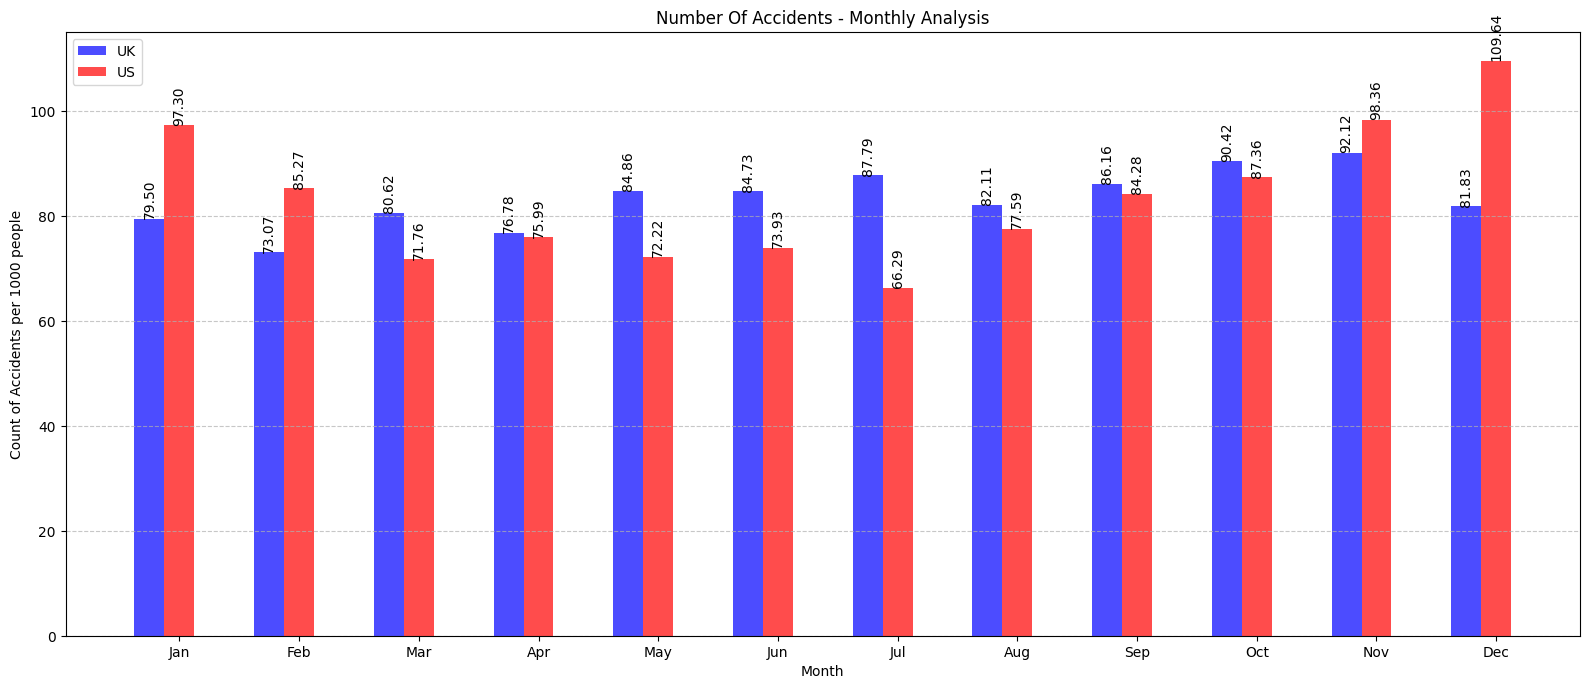

In [79]:
month_counts1 = df_uk['month'].value_counts()
month_counts2 = df_us['month'].value_counts()
# month_counts3 = df_et['month'].value_counts()

# Get unique months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' column to categorical with custom order
df_uk['month'] = pd.Categorical(df_uk['month'], categories=months, ordered=True)
df_us['month'] = pd.Categorical(df_us['month'], categories=months, ordered=True)
# df_et['month'] = pd.Categorical(df_et['month'], categories=months, ordered=True)

# Sort the DataFrame based on the custom order
df_uk_sorted = df_uk.sort_values('month')
df_us_sorted = df_us.sort_values('month')
# df_et_sorted = df_et.sort_values('month')

# Calculate average counts for each country
average_counts1 = (month_counts1 / len(df_uk['month'])) * 1000
average_counts2 = (month_counts2 / len(df_us['month'])) * 1000
# average_counts3 = (month_counts3 / len(df_et['month'])) * 1000

# Get the x positions for the bars
x = np.arange(len(months))

# Plot the data for months
plt.figure(figsize=(16, 7))
bar_width = 0.25  # Width of the bars

bars1 = plt.bar(x - bar_width, average_counts1.reindex(months, fill_value=0), bar_width, label='UK', color='blue', alpha=0.7)
bars2 = plt.bar(x, average_counts2.reindex(months, fill_value=0), bar_width, label='US', color='red', alpha=0.7)
# bars3 = plt.bar(x + bar_width, average_counts3.reindex(months, fill_value=0), bar_width, label='Ethiopia', color='green', alpha=0.7)

plt.title('Number Of Accidents - Monthly Analysis')
plt.xlabel('Month')
plt.ylabel('Count of Accidents per 1000 people')
plt.xticks(x, months, rotation=0)
plt.legend()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, '%.2f' % height, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

# Seasonal Analysis - Together

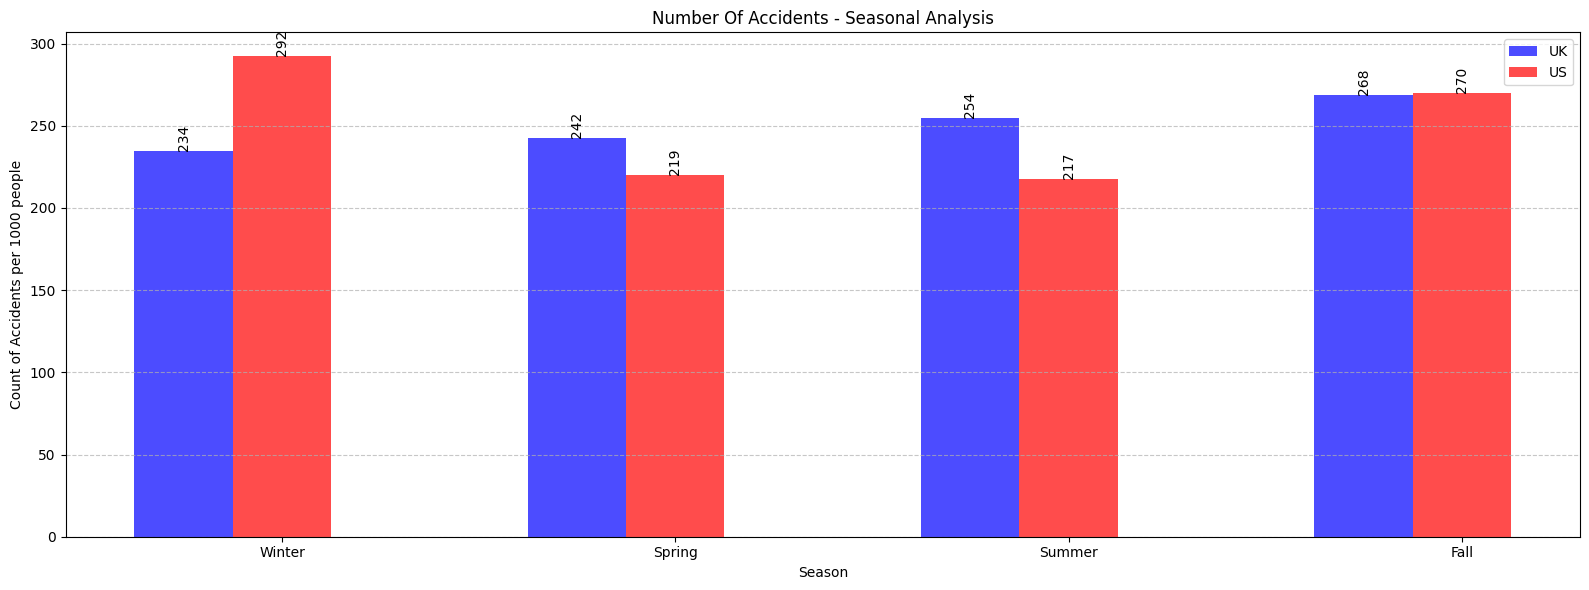

In [92]:
# Assuming 'df_uk', 'df_us', and 'df_ethiopia' are your DataFrames containing the 'season' column
season_counts1 = df_uk['season'].value_counts()
season_counts2 = df_us['season'].value_counts()
# season_counts3 = df_et['season'].value_counts()

# Get unique seasons
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

# Convert 'season' column to categorical with custom order
df_uk['season'] = pd.Categorical(df_uk['season'], categories=seasons, ordered=True)
df_us['season'] = pd.Categorical(df_us['season'], categories=seasons, ordered=True)
# df_et['season'] = pd.Categorical(df_et['season'], categories=seasons, ordered=True)

# Sort the DataFrame based on the custom order
df_uk_sorted = df_uk.sort_values('season')
df_us_sorted = df_us.sort_values('season')
# df_et_sorted = df_et.sort_values('season')

# Calculate average counts for each country
average_counts1 = (season_counts1 / len(df_uk['season'])) * 1000
average_counts2 = (season_counts2 / len(df_us['season'])) * 1000
# average_counts3 = (season_counts3 / len(df_et['season'])) * 1000

# Get the x positions for the bars
x = np.arange(len(seasons))

# Plot the data
plt.figure(figsize=(16, 6))
bar_width = 0.25  # Width of the bars

bars1 = plt.bar(x - bar_width, average_counts1.reindex(seasons, fill_value=0), bar_width, label='UK', color='blue', alpha=0.7)
bars2 = plt.bar(x, average_counts2.reindex(seasons, fill_value=0), bar_width, label='US', color='red', alpha=0.7)
# bars3 = plt.bar(x + bar_width, average_counts3.reindex(seasons, fill_value=0), bar_width, label='Ethiopia', color='green', alpha=0.7)

plt.title('Number Of Accidents - Seasonal Analysis')
plt.xlabel('Season')
plt.ylabel('Count of Accidents per 1000 people')
plt.xticks(x, seasons, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % height, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


# Weekly Analysis - Together

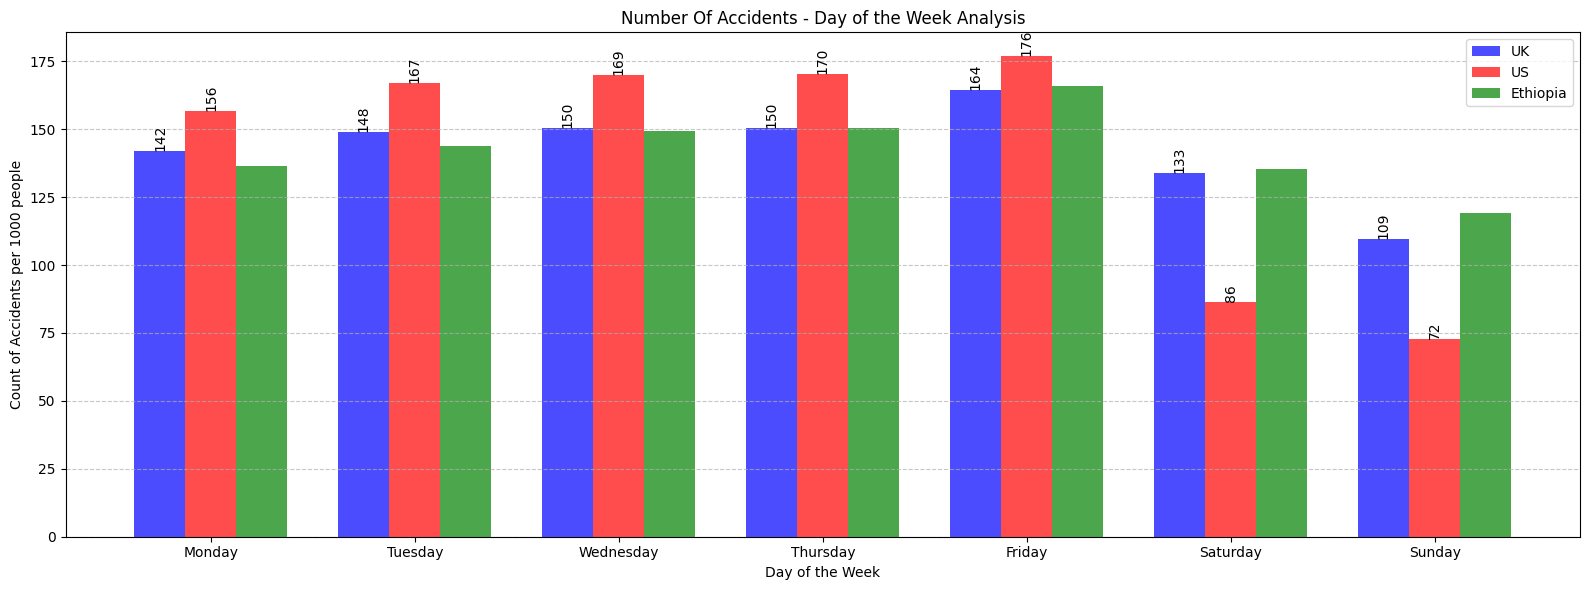

In [94]:
# Assuming 'df_uk', 'df_us', and 'df_ethiopia' are your DataFrames containing the 'day_of_week' column
day_counts_uk = df_uk['day_of_week'].value_counts()
day_counts_us = df_us['day_of_week'].value_counts()
day_counts_et = df_et['day_of_week'].value_counts()

# Get unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' column to categorical with custom order
df_uk['day_of_week'] = pd.Categorical(df_uk['day_of_week'], categories=days_of_week, ordered=True)
df_us['day_of_week'] = pd.Categorical(df_us['day_of_week'], categories=days_of_week, ordered=True)
df_et['day_of_week'] = pd.Categorical(df_et['day_of_week'], categories=days_of_week, ordered=True)

# Sort the DataFrame based on the custom order
df_uk_sorted = df_uk.sort_values('day_of_week')
df_us_sorted = df_us.sort_values('day_of_week')
df_et_sorted = df_et.sort_values('day_of_week')

# Calculate average counts for each country
average_counts_uk = (day_counts_uk / len(df_uk['day_of_week'])) * 1000
average_counts_us = (day_counts_us / len(df_us['day_of_week'])) * 1000
average_counts_et = (day_counts_et / len(df_et['day_of_week'])) * 1000

# Get the x positions for the bars
x = np.arange(len(days_of_week))

# Plot the data
plt.figure(figsize=(16, 6))
bar_width = 0.25  # Width of the bars

bars_uk = plt.bar(x - bar_width, average_counts_uk.reindex(days_of_week, fill_value=0), bar_width, label='UK', color='blue', alpha=0.7)
bars_us = plt.bar(x, average_counts_us.reindex(days_of_week, fill_value=0), bar_width, label='US', color='red', alpha=0.7)
bars_et = plt.bar(x + bar_width, average_counts_et.reindex(days_of_week, fill_value=0), bar_width, label='Ethiopia', color='green', alpha=0.7)

plt.title('Number Of Accidents - Day of the Week Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents per 1000 people')
plt.xticks(x, days_of_week, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar
for bars in [bars_uk, bars_us]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % height, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()